## EDA - Exploratory Data Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [3]:
centers=pd.read_csv('DATA/fulfilment_center_info.csv')
meals=pd.read_csv('DATA/meal_info.csv')
df=pd.read_csv('DATA/train.csv')

In [4]:
df=df.merge(centers,on='center_id')
df=df.merge(meals,on='meal_id')

In [5]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [5]:
df.shape

(456548, 15)

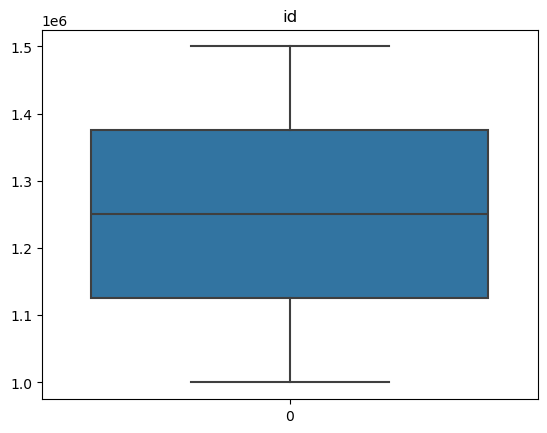

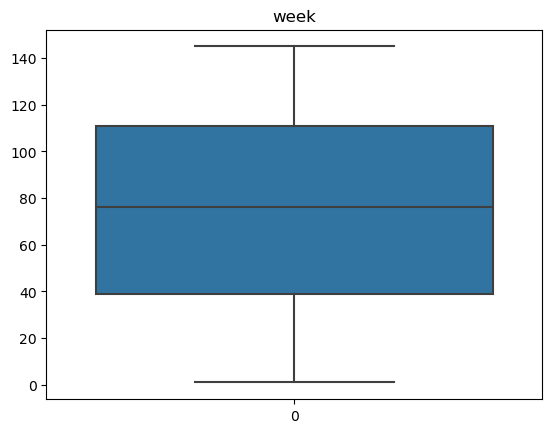

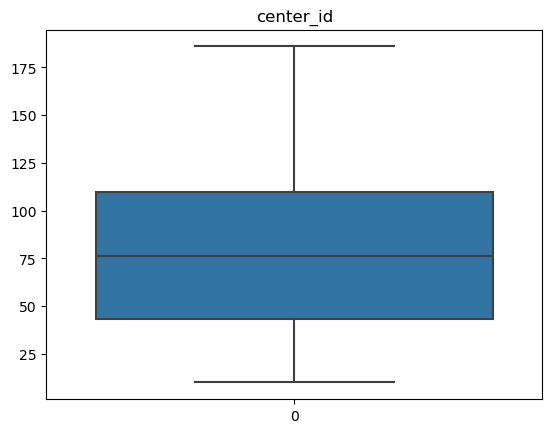

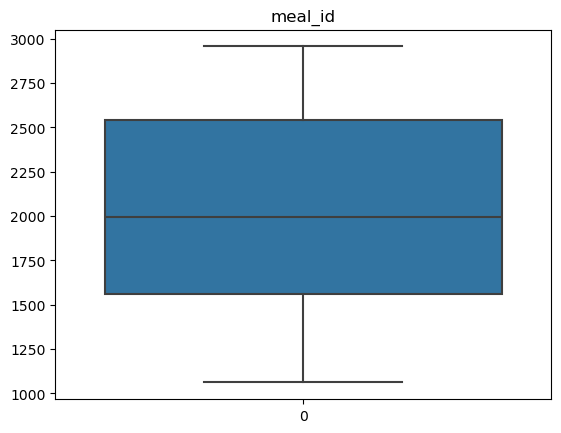

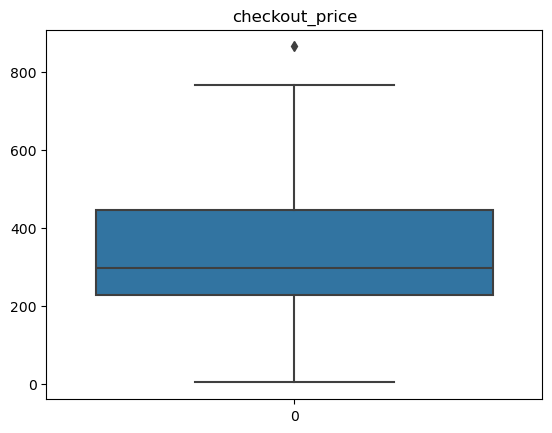

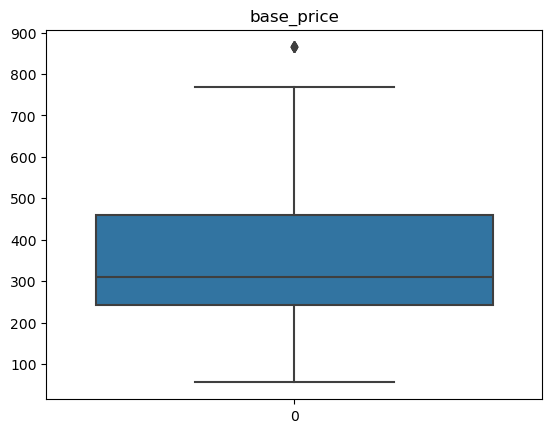

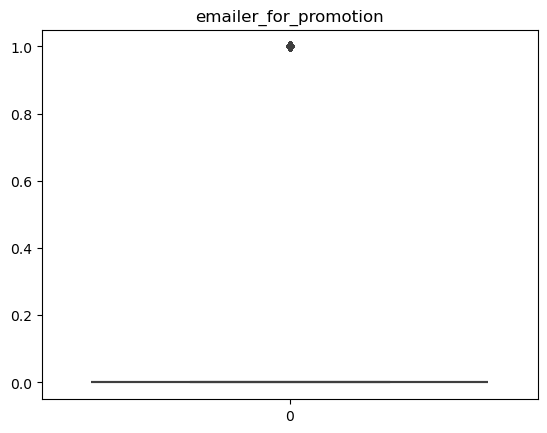

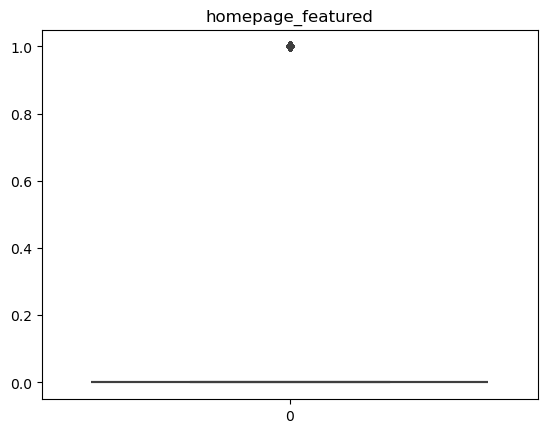

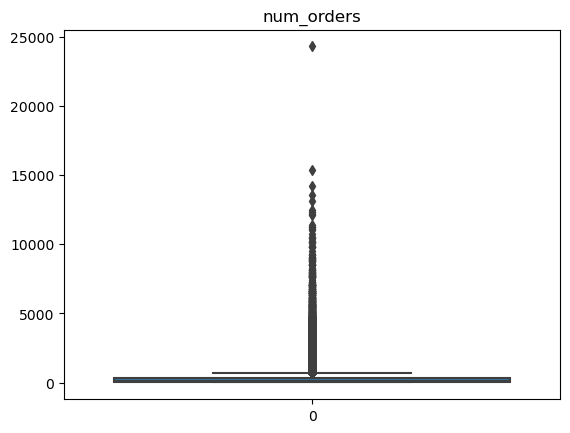

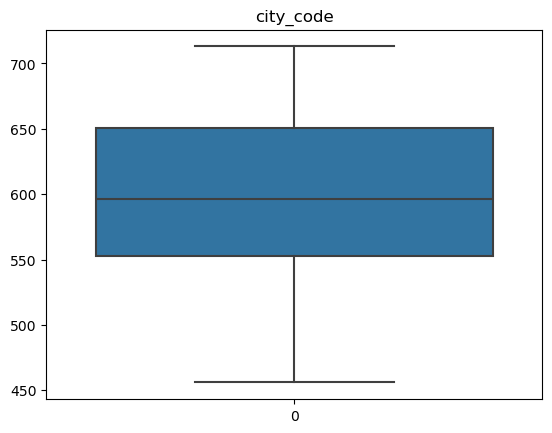

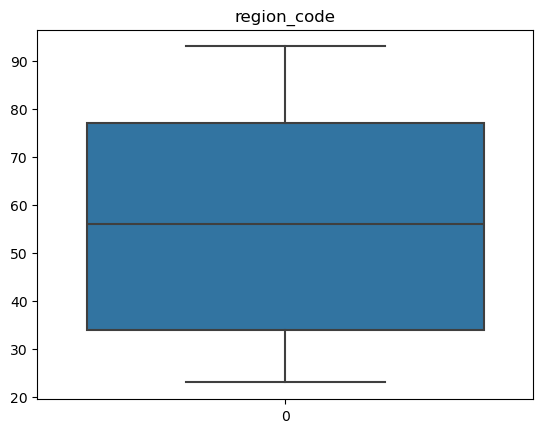

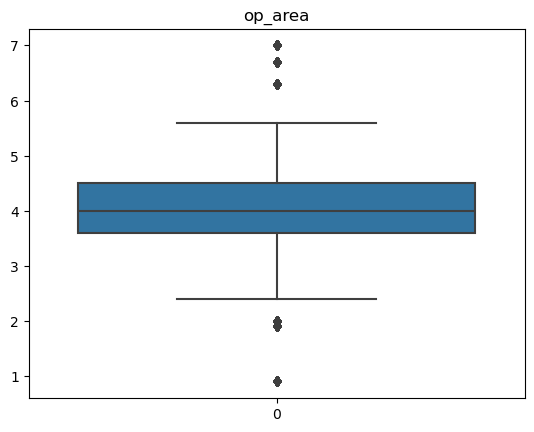

In [7]:
for i in df.select_dtypes(['int','float']).columns:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

/home/muhammed/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


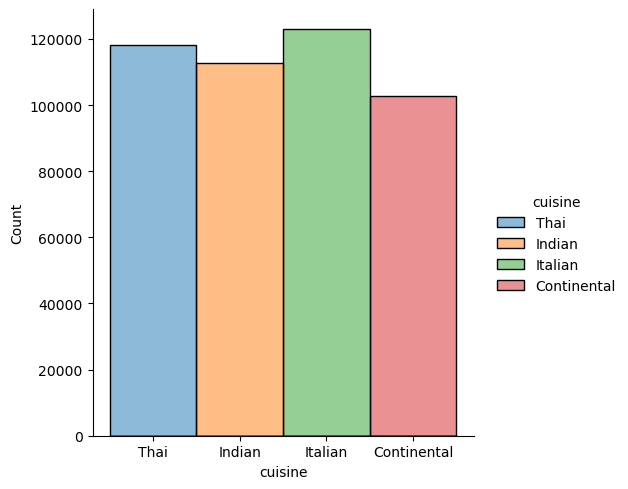

In [15]:
sns.displot(x=df['cuisine'],hue=df['cuisine'])

#### Here we can see that most popular cuisine is italian and followed by Thai.


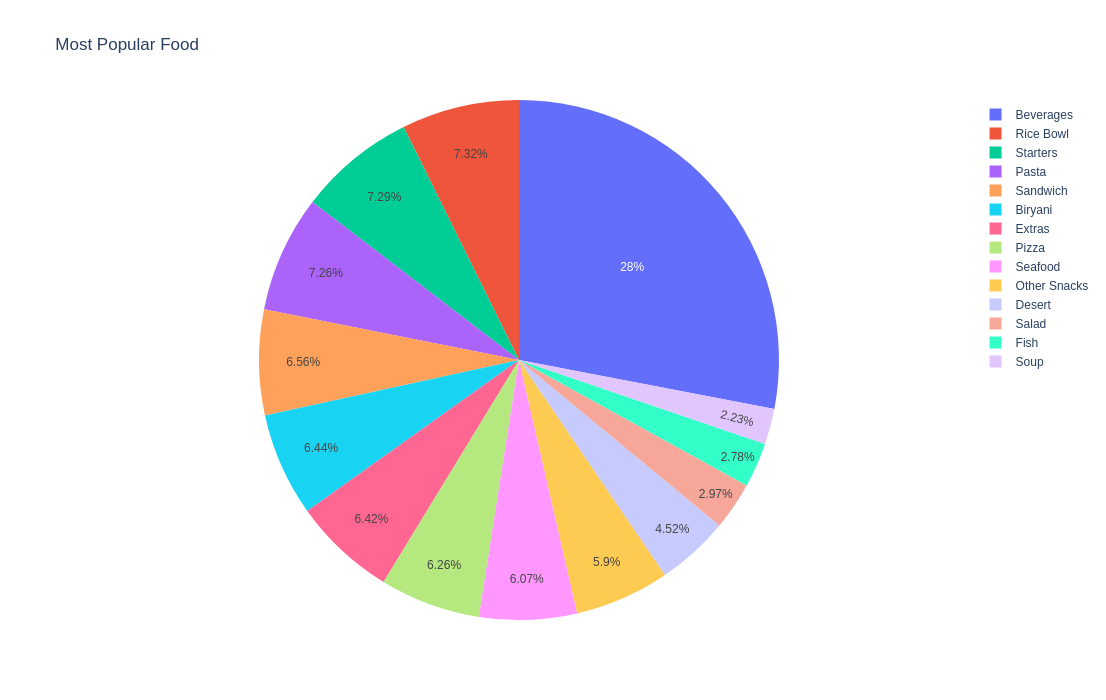

In [25]:

fig=px.pie(values=df['category'].value_counts(),names=df['category'].unique(),title='Most Popular Food')
fig.update_layout(width=700,height=700)
fig.show()

#### Here We can See that most popular food is Beverages and followed by Rice Bowl ,Sandwich ,pizza.

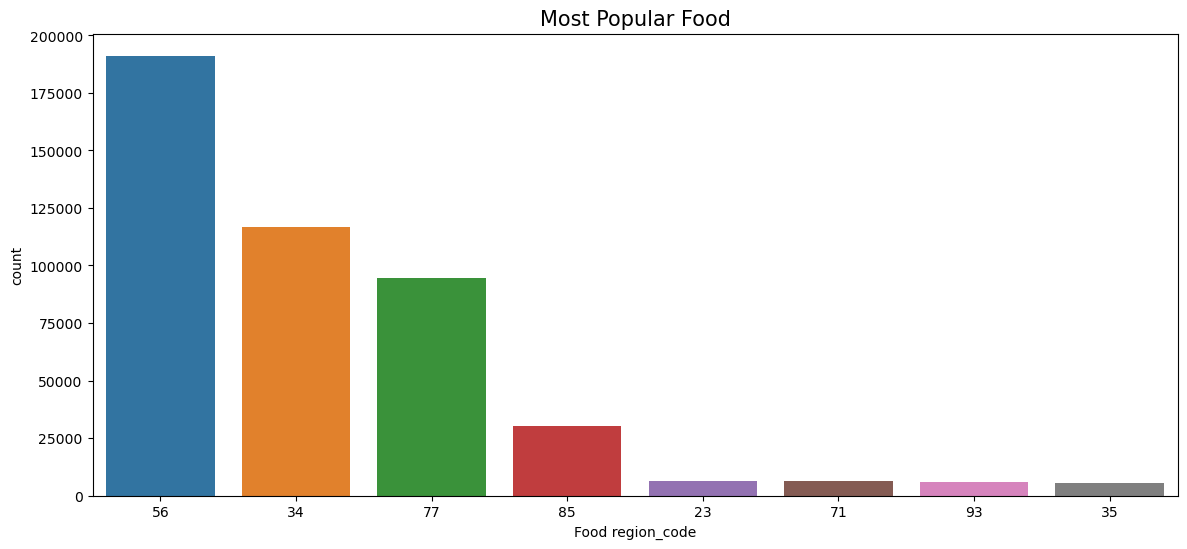

In [12]:


category_counts = df['region_code'].value_counts().reset_index()
category_counts.columns = ['region_code', 'count']


category_counts = category_counts.sort_values(by='count', ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x='region_code', y='count', data=category_counts,order=category_counts['region_code'])
plt.xlabel('Food region_code')
plt.title('Most Popular Food', size=15)
plt.show()


In [10]:
df['city_code'].unique()

array([647, 614, 679, 659, 526, 590, 599, 685, 461, 649, 541, 478, 703,
       576, 628, 702, 579, 596, 648, 632, 522, 615, 577, 517, 651, 683,
       713, 609, 675, 553, 593, 654, 693, 658, 515, 556, 561, 680, 620,
       638, 700, 676, 604, 456, 562, 695, 699, 602, 485, 698, 473])

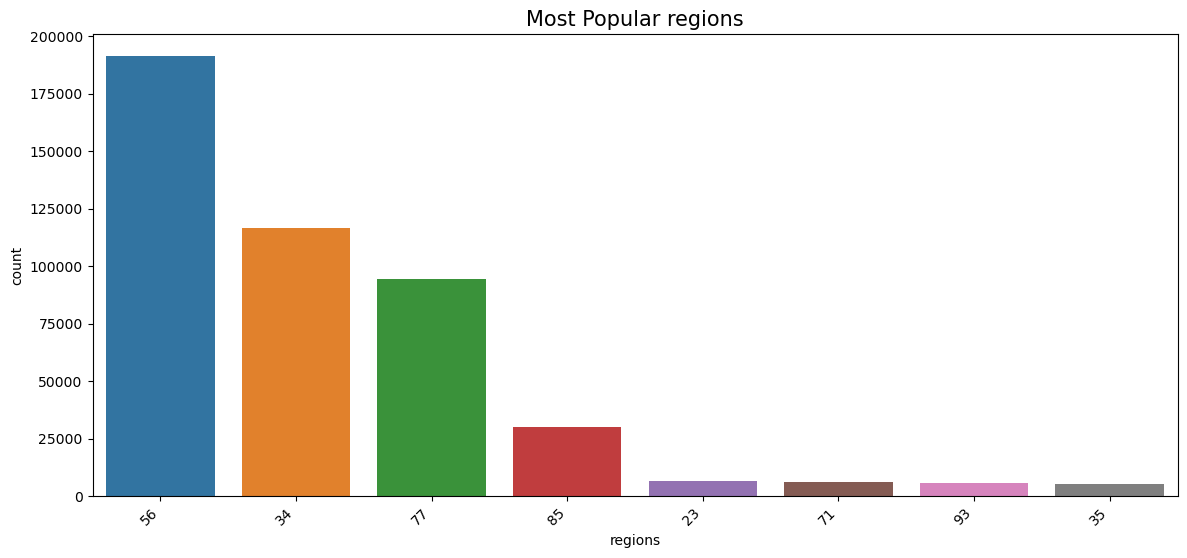

In [22]:


category_counts = df['region_code'].value_counts().reset_index()
category_counts.columns = ['region_code', 'count']


category_counts = category_counts.sort_values(by='count', ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x='region_code', y='count', data=category_counts,order=category_counts['region_code'])
plt.xlabel('regions')
plt.title('Most Popular regions', size=15)
plt.xticks(rotation=45, ha='right')
plt.show()


Text(0.5, 0, 'Center Type')

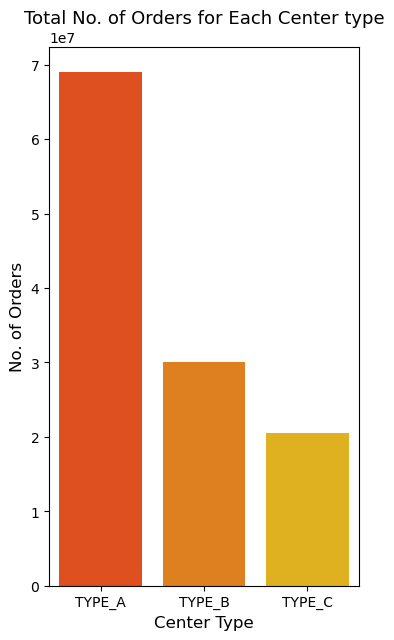

In [10]:
fig=plt.figure(figsize=(4,7))
plt.title('Total No. of Orders for Each Center type',fontdict={'fontsize':13})
sns.barplot(y='num_orders', x='center_type', data=df.groupby('center_type').sum()['num_orders'].reset_index(),palette='autumn');
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Center Type',fontdict={'fontsize':12})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 [Text(0, 0, '590'),
  Text(1, 0, '526'),
  Text(2, 0, '638'),
  Text(3, 0, '522'),
  Text(4, 0, '517'),
  Text(5, 0, '604'),
  Text(6, 0, '699'),
  Text(7, 0, '647'),
  Text(8, 0, '576'),
  Text(9, 0, '614'),
  Text(10, 0, '676'),
  Text(11, 0, '593'),
  Text(12, 0, '685'),
  Text(13, 0, '700'),
  Text(14, 0, '713'),
  Text(15, 0, '579'),
  Text(16, 0, '679'),
  Text(17, 0, '456'),
  Text(18, 0, '703'),
  Text(19, 0, '698'),
  Text(20, 0, '577'),
  Text(21, 0, '599'),
  Text(22, 0, '596'),
  Text(23, 0, '648'),
  Text(24, 0, '602'),
  Text(25, 0, '659'),
  Text(26, 0, '654'),
  Text(27, 0, '628'),
  Text(28, 0, '651'),
  Text(29, 0, '562'),
  Text(30, 0, '615'),
  Text(31, 0, '556'),
  Text(32, 0, '473'),
  Text(33, 0, '561'),
  Text(34, 0, '461'),
  Text(35,

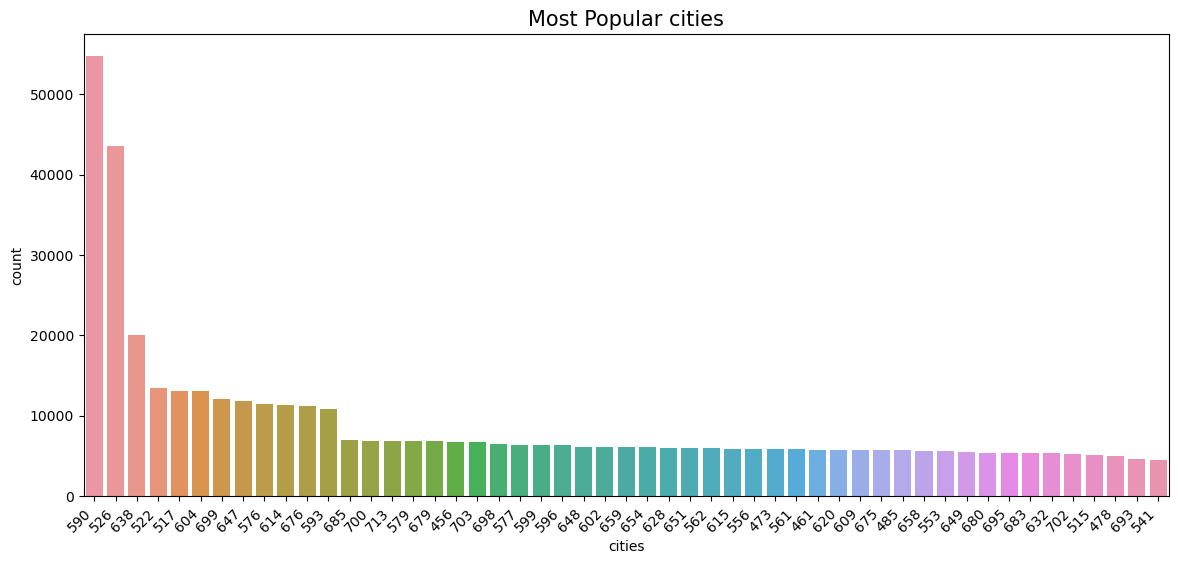

In [13]:


category_counts = category_counts.sort_values(by='count', ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x='city_code', y='count', data=category_counts,order=category_counts['city_code'])
plt.xlabel('cities')
plt.title('Most Popular cities', size=15)
plt.xticks(rotation=45, ha='right')


In [27]:
center_orders_sorted

,center_id,num_orders
2,13,4296545
18,43,3920294
0,10,3381018
21,52,3125835
63,137,3117478
...,...,...
35,74,691044
73,162,680255
68,149,637527
16,41,497338


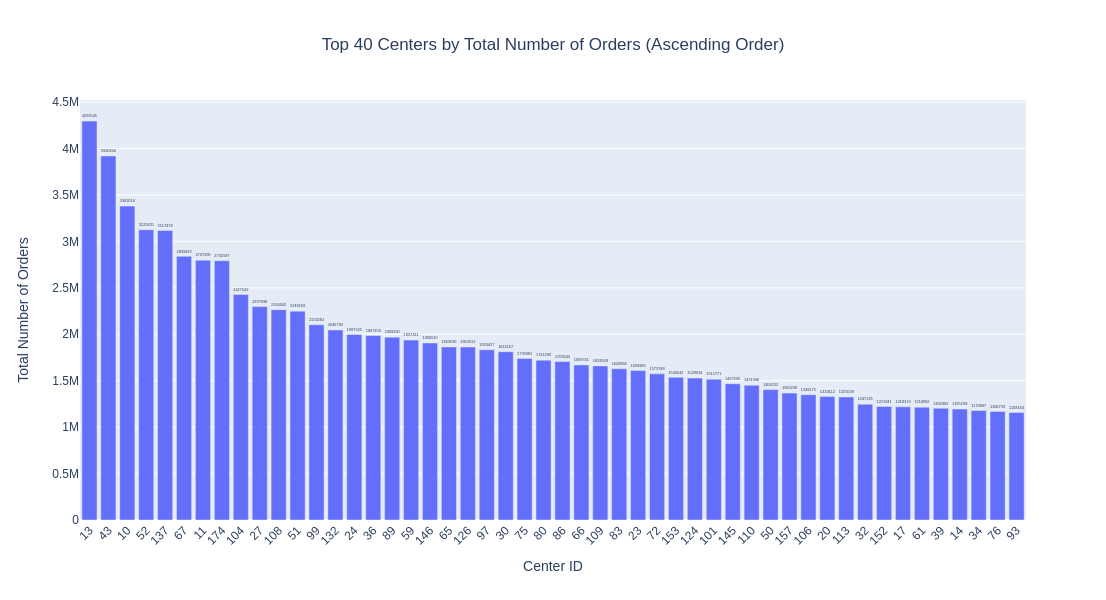

In [31]:
import plotly.express as px
import pandas as pd

# Group by center_id and sum the number of orders
center_orders = df.groupby('center_id').sum()['num_orders'].reset_index()

# Sort by the number of orders in ascending order
center_orders_sorted = center_orders.sort_values(by='num_orders', ascending=False)

# Select the top 40 centers (with the fewest orders)
top_centers = center_orders_sorted.head(50)

# Plot the data using Plotly
fig = px.bar(top_centers, 
             x='center_id', 
             y='num_orders', 
             text='num_orders', 
             title='Top 40 Centers by Total Number of Orders (Ascending Order)',
             labels={'center_id':'Center ID', 'num_orders':'Total Number of Orders'},
             height=600,
             template='plotly')

# Update the layout for better readability
fig.update_layout(xaxis_title='Center ID', 
                  yaxis_title='Total Number of Orders',
                  title_x=0.5,
                  xaxis={'type': 'category'},  # Ensures every center ID is shown
                  xaxis_tickangle=-45)  # Rotates the labels for better readability

# Ensure the text (number of orders) is displayed on the bars
fig.update_traces(textposition='outside')

# Show the plot
fig.show()


/home/muhammed/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/muhammed/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='week', ylabel='num_orders'>

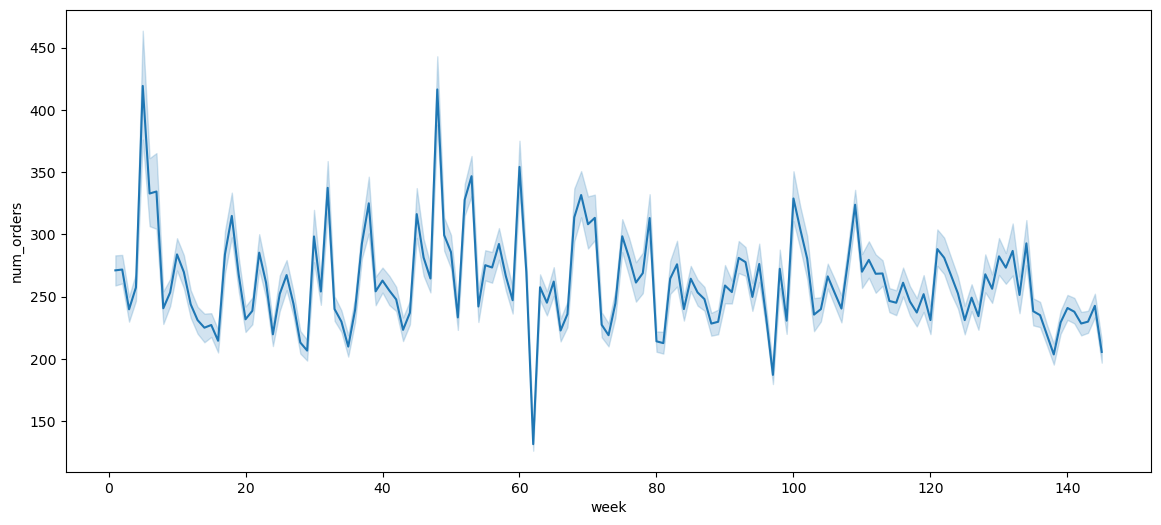

In [27]:
plt.figure(figsize=(14,6))
sns.lineplot(x=df['week'],y=df['num_orders'])

/tmp/ipykernel_8046/3743250303.py:1: FutureWarning: The provided callable <function sum at 0x77c9081bd940> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  region_table = pd.pivot_table(df, values='num_orders', index=['week'],
/home/muhammed/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/muhammed/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'num_orders')

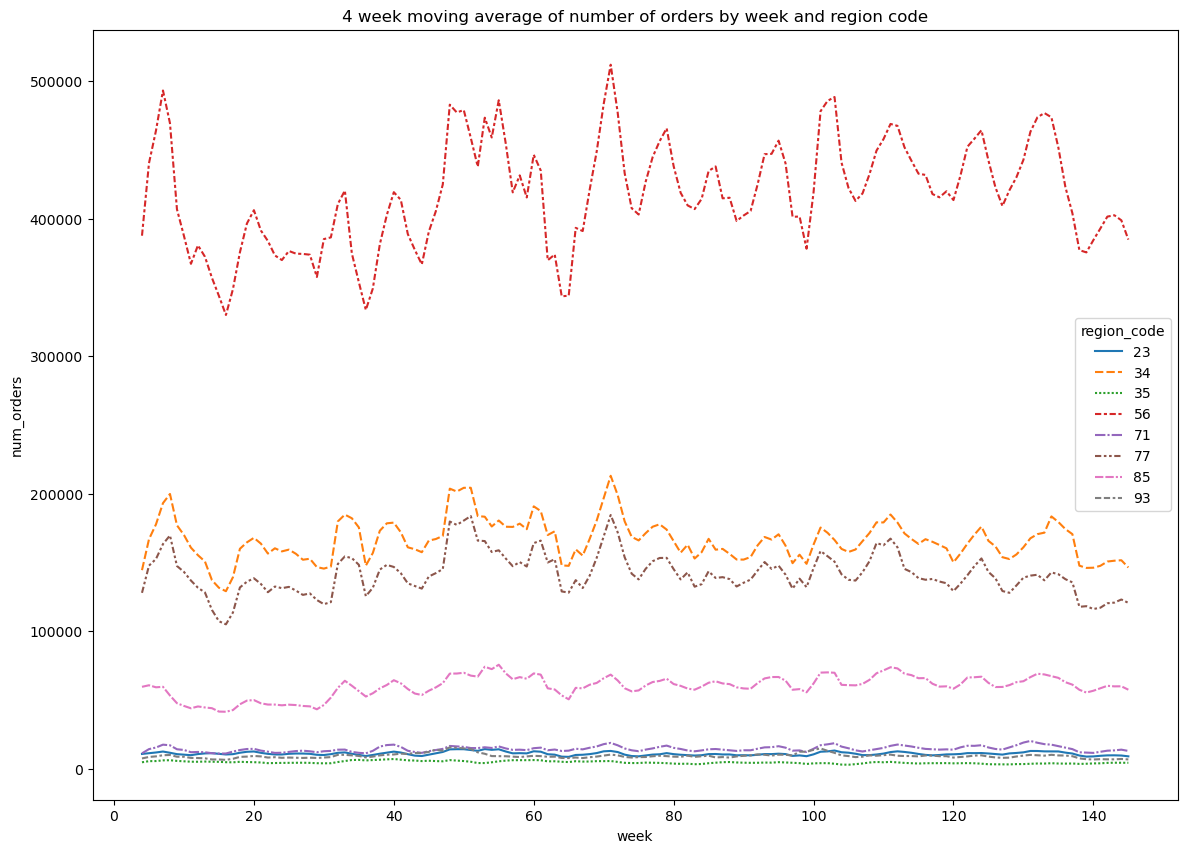

In [8]:
region_table = pd.pivot_table(df, values='num_orders', index=['week'],
                    columns=['region_code'], aggfunc=np.sum)
plt.figure(figsize=(14, 10))
sns.lineplot(data=region_table.rolling(window=4).mean()).set(title='4 week moving average of number of orders by week and region code')
plt.ylabel('num_orders')

* Here we can see that checkout_price and base_price has high correlation ,we will drop the base_price feature in model selection

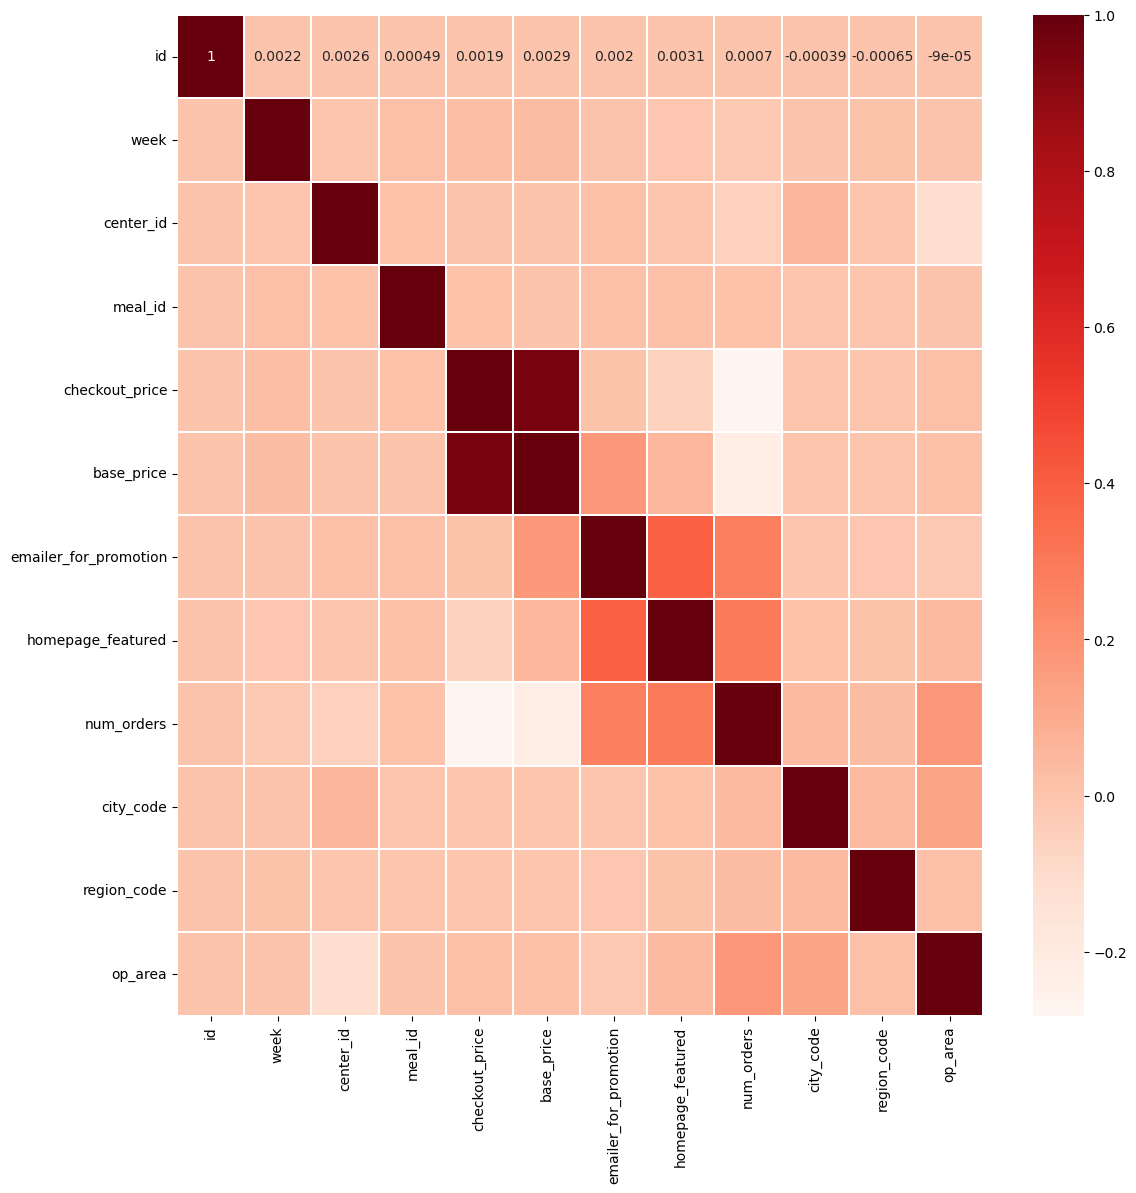

In [12]:
numeric_df=df.select_dtypes(['int','float'])
c=numeric_df.corr()
plt.figure(figsize=(13,13))
sns.heatmap(c,annot=True,linewidths=0.1,cmap='Reds')
plt.show()

#### Here we can see that
* checkout_price and base_price has same value , so we will remove base_price feature in feature selection.
* id has no variation so it will remove in featuer selection